<a href="https://colab.research.google.com/github/Rizki-132/Allmateri/blob/main/Klasifikasi_program_pkh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

Import Data

In [232]:
df = pd.read_csv('/content/data_program_pkh.csv')
df

,nama,umur,tempat lahir,jenis pekerjaan,jumlah penghasilan,jenis kelamin,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan,penerima PKH
0,HENI SUKMAENI,41,Majalengka,Guru,1383377,Perempuan,1,2,2,Duda,0
1,SAID,58,Majalengka,Satpam,1750067,Laki-laki,0,3,0,Duda,0
2,AAN KUSNAEDI,63,Majalengka,Sopir,1838230,Laki-laki,3,1,2,Janda,0
3,NUNUNG NURHAYATI,39,Majalengka,Dokter,356279,Laki-laki,1,0,2,Menikah,0
4,NURBAETI,35,Majalengka,PNS,1633686,Perempuan,2,2,3,Janda,0
...,...,...,...,...,...,...,...,...,...,...,...
320,MUSTAMAN,51,Majalengka,Buruh,1790521,Perempuan,0,2,3,Belum Menikah,0
321,SUSI,60,Majalengka,Petani,1023910,Perempuan,2,2,1,Janda,0
322,WARNITA,18,Majalengka,Pengangguran,1848002,Perempuan,2,2,3,Duda,0
323,SAKER,25,Majalengka,Guru,575637,Laki-laki,1,2,0,Menikah,0


#Data Understanding

In [233]:
print("data shape", df.shape)

data shape (325, 11)


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   nama                   325 non-null    object
 1   umur                   325 non-null    int64 
 2   tempat lahir           325 non-null    object
 3   jenis pekerjaan        325 non-null    object
 4   jumlah penghasilan     325 non-null    int64 
 5   jenis kelamin          325 non-null    object
 6   jumlah keluarga (SD)   325 non-null    int64 
 7   jumlah keluarga (SMP)  325 non-null    int64 
 8   jumlah keluarga (SMA)  325 non-null    int64 
 9   status perkawinan      325 non-null    object
 10  penerima PKH           325 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 28.1+ KB


In [235]:
df[['jumlah penghasilan', 'jumlah keluarga (SD)', 'jumlah keluarga (SMP)', 'jumlah keluarga (SMA)']].describe()

,jumlah penghasilan,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA)
count,3.250000e+02,325.000000,325.000000,325.000000
mean,9.634554e+05,1.473846,1.455385,1.535385
std,5.754937e+05,1.112538,1.052045,1.120575
min,1.108500e+04,0.000000,0.000000,0.000000
25%,4.554220e+05,0.000000,1.000000,1.000000
50%,9.374170e+05,1.000000,1.000000,2.000000
75%,1.463674e+06,2.000000,2.000000,3.000000
max,1.994183e+06,3.000000,3.000000,3.000000


In [236]:
df['penerima PKH'].value_counts()

penerima PKH
0    211
1    114
Name: count, dtype: int64

#Cleaning Data

In [237]:
df.isnull().sum()

nama                     0
umur                     0
tempat lahir             0
jenis pekerjaan          0
jumlah penghasilan       0
jenis kelamin            0
jumlah keluarga (SD)     0
jumlah keluarga (SMP)    0
jumlah keluarga (SMA)    0
status perkawinan        0
penerima PKH             0
dtype: int64

In [238]:
#mencari duplikasi
df.duplicated().sum()

0

#Exploratory Data Analysisi(EDA)

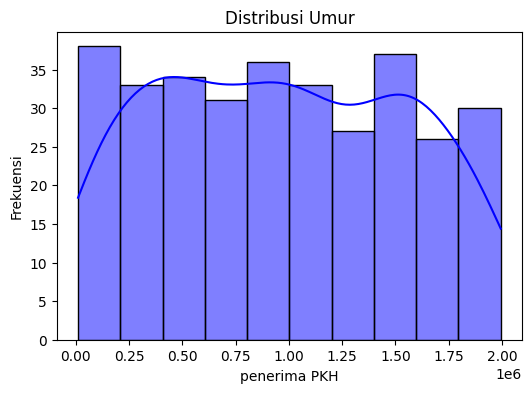

In [239]:
# @title umur vs jumlah penghasilan
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='jumlah penghasilan', bins=10, kde=True, color='blue')
plt.title('Distribusi Umur')
plt.xlabel('penerima PKH')
plt.ylabel('Frekuensi')
plt.show()

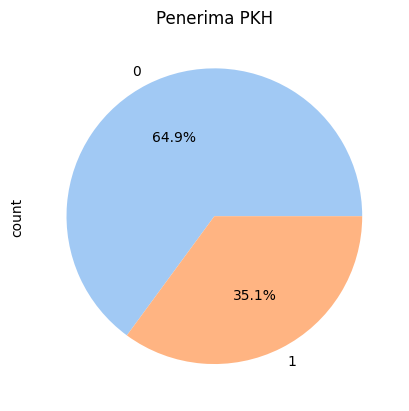

In [240]:
sns.set_palette('pastel')
df['penerima PKH'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Penerima PKH')
plt.show()

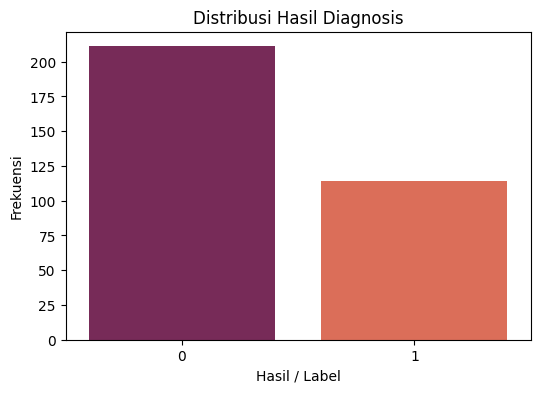

In [241]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='penerima PKH', palette='rocket')

plt.title('Distribusi Hasil Diagnosis')
plt.xlabel('Hasil / Label')
plt.ylabel('Frekuensi')
plt.show()

In [242]:
df = df.drop(columns=['nama', 'tempat lahir', 'jenis pekerjaan', 'jenis kelamin', 'status perkawinan'])
df
df.corr()

,umur,jumlah penghasilan,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),penerima PKH
umur,1.000000,-0.047898,-0.044797,-0.016499,0.013154,0.013443
jumlah penghasilan,-0.047898,1.000000,0.049391,0.070606,-0.016501,-0.579585
jumlah keluarga (SD),-0.044797,0.049391,1.000000,-0.016163,0.127625,0.214657
jumlah keluarga (SMP),-0.016499,0.070606,-0.016163,1.000000,-0.032037,0.209228
jumlah keluarga (SMA),0.013154,-0.016501,0.127625,-0.032037,1.000000,0.189978
penerima PKH,0.013443,-0.579585,0.214657,0.209228,0.189978,1.000000


<Axes: >

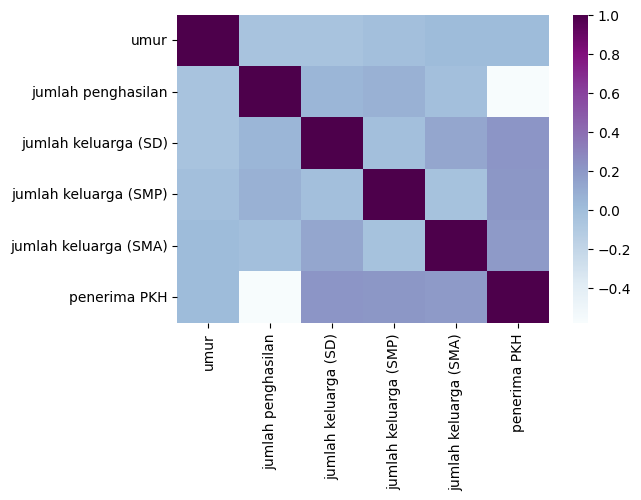

In [243]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='BuPu')

#Preparation Data

In [244]:
x = df.drop(columns=['penerima PKH'])
y = df['penerima PKH']

print("X : ", x.shape)
print("y : ", y.shape)

X :  (325, 5)
y :  (325,)


In [245]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [246]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Modeling dan Evaluasi

In [247]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi model SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.95      0.84      0.89        25

    accuracy                           0.92        65
   macro avg       0.93      0.91      0.92        65
weighted avg       0.93      0.92      0.92        65

Akurasi model SVM : 92.31%


#Testing

In [255]:
new_data = {
            'nama' : ['Rizki','Hendar','Gus Dendi'],
            'umur' : [25, 30, 80],
            'jumlah penghasilan' : [100000, 300000, 200000],
            'jumlah keluarga (SD)' : [4, 2, 1],
            'jumlah keluarga (SMP)' : [0, 2, 3],
            'jumlah keluarga (SMA)' : [0, 0, 0]
             }
new_data = pd.DataFrame(new_data)
new_data

,nama,umur,jumlah penghasilan,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA)
0,Rizki,25,100000,4,0,0
1,Hendar,30,300000,2,2,0
2,Gus Dendi,80,200000,1,3,0


In [256]:
# Asumsikan clf_svm adalah model SVM yang sudah dilatih
# Misalnya: clf_svm.fit(X_train_scaled, y_train)

# Prediksi menggunakan data numerik yang sudah di-scale
scaled_new_data = scaler.transform(new_data[['umur','jumlah penghasilan','jumlah keluarga (SD)','jumlah keluarga (SMP)','jumlah keluarga (SMA)']])
y_pred_new = clf.predict(scaled_new_data)

print("Prediksi:", y_pred_new)

Prediksi: [1 1 1]
